In [2]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00


# **Import The Necessary Library**

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

[*********************100%***********************]  1 of 1 completed


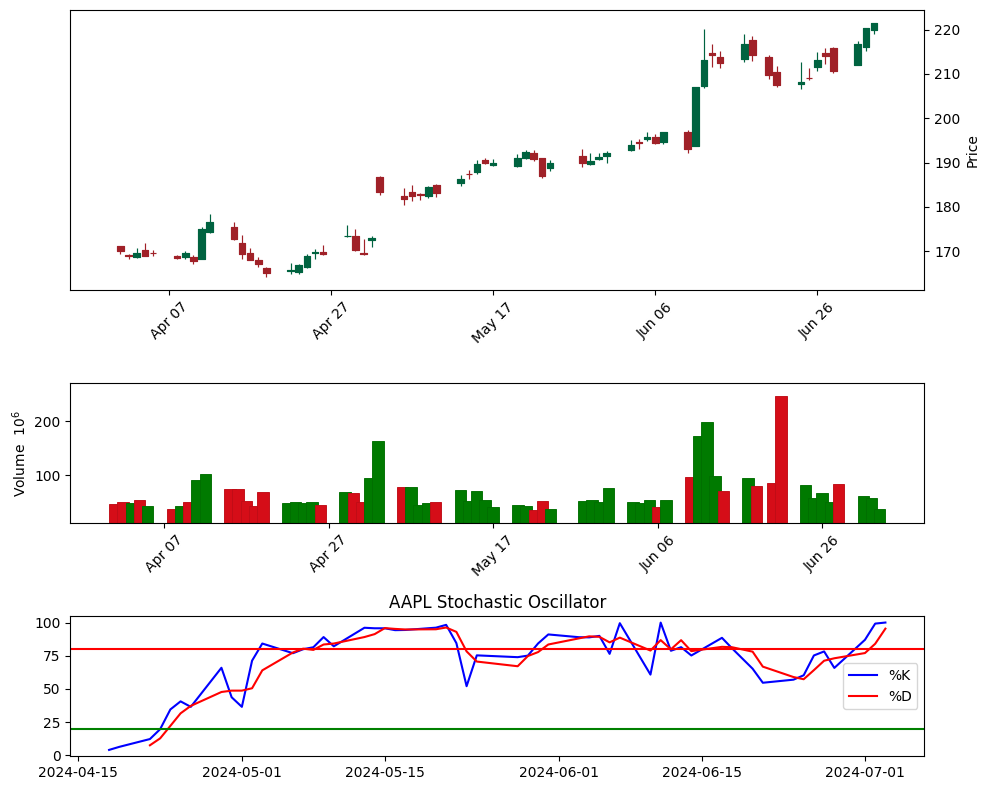

In [5]:
# use the function to calculate S.O(%K)
def stochastic_oscillator(df, period=14, smooth_k=3, smooth_d=3):
    df['L14'] = df['Low'].rolling(window=period).min()
    df['H14'] = df['High'].rolling(window=period).max()
    df['%K'] = (df['Close'] - df['L14']) * 100 / (df['H14'] - df['L14'])
    df['%D'] = df['%K'].rolling(window=smooth_k).mean()
    return df

# Download data using yfinance
ticker = 'AAPL'
data = yf.download(ticker, start='2024-04-01', end='2024-07-05')

# Ensure that the index of the DataFrame is a DatetimeIndex
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

# Check if data contains the required columns
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
if not all(column in data.columns for column in required_columns):
    raise ValueError(f"DataFrame must contain the following columns: {required_columns}")

# Create a figure and define subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1, 1]})

# Apply the stochastic oscillator function
data = stochastic_oscillator(data)

# Plot the candlestick chart
mpf.plot(data, type='candle', ax=ax1, volume=ax2, show_nontrading=True, style='charles')

# Plot the stochastic oscillator on ax3
ax3.plot(data['%K'], label='%K', color='blue')# plot the candelstick chart
ax3.plot(data['%D'], label='%D', color='red')
ax3.axhline(y=80, color='r', linestyle='-')# plot the histogram
ax3.axhline(y=20, color='g', linestyle='-')
ax3.set_title(f'{ticker} Stochastic Oscillator')
ax3.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
